In [2]:
from qiskit import*
from qiskit.tools.visualization import*
from numpy import*
from matplotlib.pyplot import*

In [3]:
m12=7.39*10**-5
m13=2.525*10**-3
m23=m13
th12=0.5902
th23=0.8656
th13=0.1502
LE=linspace(0,1000,11)#(L/E)
le=linspace(0,1400,141)

In [4]:
muon_counts=[]
electron_counts=[]
tau_counts=[]

In [5]:
def phi_1(E):
    return(2*(1.27*m12*E))
def phi_2(E):
    return(2*(1.27*m13*E))
def prob_t(E):
    return((cos(th13)**2)*((sin(2*th23))**2)*(sin(1.27*m23*E))**2)
def prob_e(E):
    return((sin(2*th13)**2)*((sin(th23))**2)*(sin(1.27*m23*E))**2) 
def prob_m(E):
    return(1-(cos(th13)**2)*((sin(2*th23))**2)*((sin(1.27*m23*E))**2)-(sin(2*th13)**2)*((sin(th23))**2)*(sin(1.27*m23*E))**2)

In [6]:
alpha=-0.6031
beta=-2.0125
gamma=0.7966
delta=1.0139
eps=0.7053
zeta=1.3599

In [9]:
PMNS=QuantumCircuit(2,name='PMNS')
PMNS.u(-1*alpha,0,0,0)
PMNS.u(-1*beta,0,0,1)
PMNS.cx(1,0)
PMNS.u(-1*gamma,0,0,0)
PMNS.u(-1*delta,0,0,1)
PMNS.cx(1,0)
PMNS.u(-1*eps,0,0,0)
PMNS.u(-1*zeta,0,0,1)
#PMNS.draw()
PMNS.to_gate()

In [10]:
PMNSd=QuantumCircuit(2,name='PMNSd')
PMNSd.u(eps,0,0,0)
PMNSd.u(zeta,0,0,1)
PMNSd.cx(1,0)
PMNSd.u(gamma,0,0,0)
PMNSd.u(delta,0,0,1)
PMNSd.cx(1,0)
PMNSd.u(alpha,0,0,0)
PMNSd.u(beta,0,0,1)

#PMNSd.draw()
PMNSd.to_gate()

In [ ]:
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
qc=QuantumCircuit(qr,cr)
#circuit
backend=BasicAer.get_backend('qasm_simulator')
for E in LE:
    p=phi_1(E)
    q=phi_2(E)
    qc.x(qr[1])
    qc.i(qr[0])
    qc.append(PMNSd,[0,1])
    qc.u(0,0,q,qr[0])
    qc.u(0,0,p,qr[1])
    qc.append(PMNS,[0,1])
    qc.measure(qr[0],cr[0])
    qc.measure(qr[1],cr[1])
    counts=execute(qc,backend,shots=1024).result().get_counts()
    electron_counts.append(counts.get('11',0)/1024)
    muon_counts.append(counts.get('10',0)/1024)
    tau_counts.append(counts.get('01',0)/1024)
    qc.reset(qr[0])
    qc.reset(qr[1])

In [ ]:
AC_t=prob_t(le)
AC_e=prob_e(le)
AC_m=prob_m(le)

In [ ]:
plot(le,AC_t,'-b',label='tau')
plot(le,AC_e,'-r',label='electron')
plot(le,AC_m,'-y',label='muon')
plot(LE,electron_counts,'or',label='elec-Qasm')
plot(LE,muon_counts,'oy',label='muon-Qasm')
plot(LE,tau_counts,'ob',label='tau-Qasm')
legend()
#savefig('3FO.pdf')


In [61]:
elec=loadtxt('elec_qx2.csv')
muon=loadtxt('muon_qx2.csv')
tau=loadtxt('tau_qx2.csv')

In [62]:
TC_t=prob_t(LE)
TC_e=prob_e(LE)
TC_m=prob_m(LE)

In [63]:
yerr_elec=[p-q for p,q in zip(TC_e,elec)]
yerr_muon=[p-q for p,q in zip(TC_m,muon)]
yerr_tau=[p-q for p,q in zip(TC_t,tau)]

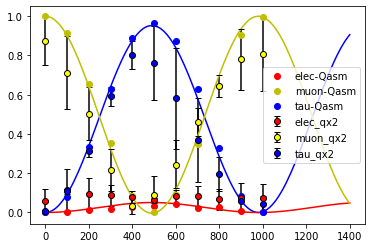

In [64]:
plot(le,AC_t,'-b')
plot(le,AC_e,'-r')
plot(le,AC_m,'-y')

errorbar(LE,elec,yerr_elec,fmt='ok',mfc='red',capsize=3,label='elec_qx2')
errorbar(LE,muon,yerr_muon,fmt='ok',mfc='yellow',capsize=3,label='muon_qx2')
errorbar(LE,tau,yerr_tau,fmt='ok',mfc='blue',capsize=3,label='tau_qx2')
         
plot(LE,electron_counts,'or',label='elec-Qasm')
plot(LE,muon_counts,'oy',label='muon-Qasm')
plot(LE,tau_counts,'ob',label='tau-Qasm')

legend()
#savefig('3FO_qx2.pdf')

In [65]:
elec=loadtxt('elec_quito.csv')
muon=loadtxt('muon_quito.csv')
tau=loadtxt('tau_quito.csv')

In [66]:
yerr_elec=[p-q for p,q in zip(TC_e,elec)]
yerr_muon=[p-q for p,q in zip(TC_m,muon)]
yerr_tau=[p-q for p,q in zip(TC_t,tau)]

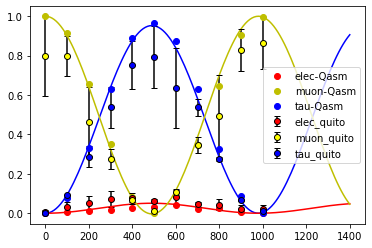

In [67]:
plot(le,AC_t,'-b')
plot(le,AC_e,'-r')
plot(le,AC_m,'-y')

errorbar(LE,elec,yerr_elec,fmt='ok',mfc='red',capsize=3,label='elec_quito')
errorbar(LE,muon,yerr_muon,fmt='ok',mfc='yellow',capsize=3,label='muon_quito')
errorbar(LE,tau,yerr_tau,fmt='ok',mfc='blue',capsize=3,label='tau_quito')
         
plot(LE,electron_counts,'or',label='elec-Qasm')
plot(LE,muon_counts,'oy',label='muon-Qasm')
plot(LE,tau_counts,'ob',label='tau-Qasm')

legend()
#savefig('3FO_quito.pdf')

In [68]:
elec=loadtxt('elec_lima.csv')
muon=loadtxt('muon_lima.csv')
tau=loadtxt('tau_lima.csv')

In [69]:
yerr_elec=[p-q for p,q in zip(TC_e,elec)]
yerr_muon=[p-q for p,q in zip(TC_m,muon)]
yerr_tau=[p-q for p,q in zip(TC_t,tau)]

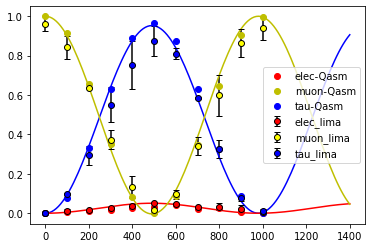

In [70]:
plot(le,AC_t,'-b')
plot(le,AC_e,'-r')
plot(le,AC_m,'-y')

errorbar(LE,elec,yerr_elec,fmt='ok',mfc='red',capsize=3,label='elec_lima')
errorbar(LE,muon,yerr_muon,fmt='ok',mfc='yellow',capsize=3,label='muon_lima')
errorbar(LE,tau,yerr_tau,fmt='ok',mfc='blue',capsize=3,label='tau_lima')
         
plot(LE,electron_counts,'or',label='elec-Qasm')
plot(LE,muon_counts,'oy',label='muon-Qasm')
plot(LE,tau_counts,'ob',label='tau-Qasm')

legend()
#savefig('3FO_lima.pdf')